# Explore here

In [111]:
import pandas as pd
import requests
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [112]:
#loading dataset
total_data = pd.read_csv("../data/raw/House_Rent_Dataset.csv")
total_data.head(5)

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [113]:
#Exploring the data
total_data.shape

(4746, 12)

In [114]:
#grabbing column
total_data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [115]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [116]:
#looking for missing data
print("Total missing value for each column")
print(total_data.isnull().sum(axis=0))

Total missing value for each column
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [117]:
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64


In [118]:
#Eliminate duplicates
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (4746, 12)
Dimensions after dropping duplicates: (4746, 12)


In [119]:
#Eliminate Irrelevant information
columns_to_remove = ["Floor", "Area Type", "Point of Contact", "Tenant Preferred", "Posted On", "BHK", "Area Locality", "Furnishing Status"]

for column in columns_to_remove:
    try:
        total_data = total_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")

total_data.head(5)

Rent  Size     City  Bathroom
0  10000  1100  Kolkata         2
1  20000   800  Kolkata         1
2  17000  1000  Kolkata         1
3  10000   800  Kolkata         1
4   7500   850  Kolkata         1

In [120]:
total_data.reset_index(drop=True, inplace=True)

In [121]:
#checking city with most higher rent
total_data[['City', 'Rent']]

City   Rent
0       Kolkata  10000
1       Kolkata  20000
2       Kolkata  17000
3       Kolkata  10000
4       Kolkata   7500
...         ...    ...
4741  Hyderabad  15000
4742  Hyderabad  29000
4743  Hyderabad  35000
4744  Hyderabad  45000
4745  Hyderabad  15000

[4746 rows x 2 columns]

In [122]:
#Price with per preferred tenants
total_data[['Size', 'Rent']]

Size   Rent
0     1100  10000
1      800  20000
2     1000  17000
3      800  10000
4      850   7500
...    ...    ...
4741  1000  15000
4742  2000  29000
4743  1750  35000
4744  1500  45000
4745  1000  15000

[4746 rows x 2 columns]

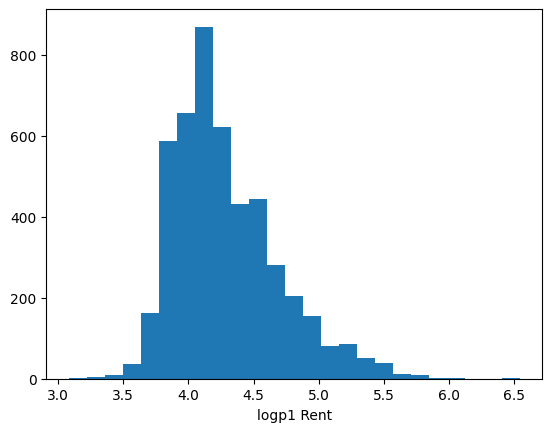

In [123]:
import numpy as np
plt.hist(np.log10(total_data['Rent']+1), bins=25)
plt.xlabel('logp1 Rent')
plt.show()

In [124]:


# Assuming 'Rent' is the target variable
X = total_data.drop('Rent', axis=1)
y = total_data['Rent']





In [125]:


# Assuming 'Rent' is the target variable
X = total_data.drop('Rent', axis=1)  # Features as DataFrame
y = total_data['Rent']  # Target

# Define categorical features that need encoding
categorical_features = ['City']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to obtain the transformed feature matrix
X_transformed = preprocessor.fit_transform(X)

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Save the preprocessor and the trained model
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(rf_regressor, 'model.pkl')

# Now you can predict, evaluate, etc.


['model.pkl']

In [126]:
X

Size       City  Bathroom
0     1100    Kolkata         2
1      800    Kolkata         1
2     1000    Kolkata         1
3      800    Kolkata         1
4      850    Kolkata         1
...    ...        ...       ...
4741  1000  Hyderabad         2
4742  2000  Hyderabad         3
4743  1750  Hyderabad         3
4744  1500  Hyderabad         2
4745  1000  Hyderabad         2

[4746 rows x 3 columns]

In [127]:
#Building  the Ramdom Regression Model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [128]:
from sklearn.metrics import mean_squared_error

# Predicting the Test set results
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1639890587.2558055


In [129]:
total_data

Rent  Size       City  Bathroom
0     10000  1100    Kolkata         2
1     20000   800    Kolkata         1
2     17000  1000    Kolkata         1
3     10000   800    Kolkata         1
4      7500   850    Kolkata         1
...     ...   ...        ...       ...
4741  15000  1000  Hyderabad         2
4742  29000  2000  Hyderabad         3
4743  35000  1750  Hyderabad         3
4744  45000  1500  Hyderabad         2
4745  15000  1000  Hyderabad         2

[4746 rows x 4 columns]